In [42]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [43]:
# 경로 설정
# path = '/content/gdrive/MyDrive/class7_2/data/'
# save_path = '/content/gdrive/MyDrive/class7_2/data/data/transformer/'
# DATA_OUT_PATH = path+'data/'
# model_name = 'transformer'

In [44]:
import pandas as pd

def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

path = '/Users/jsha/gjai/nlp/pytest/'
save_path = '/Users/jsha/gjai/nlp/'
DATA_OUT_PATH = save_path+'22_practice/'
model_name = 'practice2'

file = '감성대화말뭉치(최종데이터)_Training.xlsx'

df = pd.read_excel(path+file)

In [45]:
df.head(0)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4


In [46]:
human_df = df[['사람문장1', '사람문장2', '사람문장3', '사람문장4']]
system_df = df[['시스템응답1', '시스템응답2', '시스템응답3', '시스템응답4']]
system_df.head()

,시스템응답1,시스템응답2,시스템응답3,시스템응답4
0,아내분이 출산을 하시는군요. 정말 축하드려요.,잘 된 일이네요.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN
1,약 종류가 많아 번거로우시겠어요.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN
2,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,재취업 후 첫 월급이라 정말 기쁘시겠어요.,이 기분을 유지하려면 어떻게 해야 할까요?,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN
4,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN


In [47]:
human_df = human_df.fillna('')
system_df = system_df.fillna('')

In [48]:
dummy = human_df.iloc[:, :].to_numpy()
hum_list = [' '.join(ar).rstrip() for ar in dummy]

dummy = system_df.iloc[:, :].to_numpy()
sys_list = [' '.join(ar).rstrip() for ar in dummy]


In [49]:
inputs, outputs = hum_list, sys_list
print("inputs: ", inputs[0])
print("outputs: ", outputs[0])

inputs:  아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.
outputs:  아내분이 출산을 하시는군요. 정말 축하드려요. 잘 된 일이네요. 좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.


In [50]:
outputs_input = pd.Series(outputs).apply(lambda x : '<SOS> '+x+' <EOS>')
outputs_target = pd.Series(outputs).apply(lambda x : x+' <EOS>')
print('\noutputs_input:\n', outputs_input.sample(5))
print("\noutputs_target\n: ", outputs_target.sample(5))


outputs_input:
 38128    <SOS> 아내가 적금 통장을 달라고 해서 당황스럽겠군요. 이 상황이 마음에 들지 ...
12881    <SOS> 아들이 자기 수술비까지 사업에 투자했는데 파산 직전이라 많이 걱정스러우시...
7254     <SOS> 친구가 행복해하는 모습을 보고 같이 행복했겠어요. 그 친구는 사용자님께 ...
2921     <SOS> 어떤 상황인지 조금 더 자세히 알려 주실 수 있을까요? 혼자서 다니시다가...
39440    <SOS> 남자친구분이랑 여행을 가기로 하셨군요. 느긋하게 일정을 조율할 수 있어서...
dtype: object

outputs_target
:  36561    어떤 일로 인해 고민이 생겼을까요? 원하던 것과는 다른 업무 때문에 회의감이 드셨겠...
9399     힘든데도 도와주고 위로해 주는 이가 없어 속상하셨겠어요. 지금 사용자님이 할 수 있...
32738    무엇이 슬픔을 느끼도록 만들었나요? 이 상황을 해결할 수 있는 방안에는 무엇이 있을...
37443             가게를 왜 접으려고 생각하시나요? 가게 운영이 어려워지셨군요. <EOS>
15243    취업 때문에 걱정이시군요. 앞으로 취업을 위해 어떻게 하실 건가요? 좋은 생각이에요...
dtype: object


In [51]:
# Data Tokenizing
# 각 단어 종류에 대하여 숫자값을 배당한다
# 같은 언어 사이에서의 번역이므로, 어휘 목록을 구성하는 토크나이저는 하나만 필요하다
# 따라서 input과 output을 결합한다
from keras.preprocessing.text import Tokenizer

inputs_series = pd.Series(inputs)                                    # outputs_input 과 같은 Series로 변환한다
inputs_outputs = pd.concat([inputs_series, outputs_input], axis=0)   # input과 output을 결합한다

tokenizer = Tokenizer(num_words=None, char_level=False, lower=False)     # 고빈도 어휘만 사용하려면 num_words에 값을 줄 수 있다. char_level은 False로 해야 한다
tokenizer.fit_on_texts(inputs_outputs)     	                             # inputs와 outputs이 결합된 내용으로 인덱스를 구축한다
word_index = tokenizer.word_index                                        # 단어와 인덱스의 쌍을 가져온다

print('\n전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index: ', word_index)
print('vocab_size: ', len(word_index))


전체에서 123906개의 고유한 토큰을 찾았습니다.
word_index:  {'SOS': 1, 'EOS': 2, '수': 3, '어떻게': 4, '것': 5, '너무': 6, '잘': 7, '많이': 8, '같아': 9, '내가': 10, '안': 11, '있을까요': 12, '더': 13, '내': 14, '좋은': 15, '게': 16, '할': 17, '정말': 18, '어떤': 19, '좋겠어요': 20, '하면': 21, '있는': 22, '때문에': 23, '기분이': 24, '마음이': 25, '이': 26, '나': 27, '일이': 28, '하는': 29, '하고': 30, '친구가': 31, '바라요': 32, '해': 33, '해야': 34, '화가': 35, '그': 36, '다른': 37, '못': 38, '것이': 39, '해서': 40, '위해': 41, '봐': 42, '좋을까요': 43, '나는': 44, '좀': 45, '상황을': 46, '하시는군요': 47, '지금': 48, '나를': 49, '한': 50, '그런': 51, '열심히': 52, '거야': 53, '응': 54, '않아': 55, '일을': 56, '거': 57, '다': 58, '싶어': 59, '있어': 60, '같아요': 61, '무슨': 62, '없어': 63, '때': 64, '모르겠어': 65, '왜': 66, '말을': 67, '방법이': 68, '바랄게요': 69, '요즘': 70, '마음을': 71, '사람이': 72, '오늘': 73, '나도': 74, '걸': 75, '대화를': 76, '같이': 77, '돈을': 78, '앞으로': 79, '우리': 80, '이런': 81, '이제': 82, '들어': 83, '계속': 84, '할지': 85, '대해': 86, '다시': 87, '자세히': 88, '혼자': 89, '걱정이': 90, '통해': 91, '같아서': 92, '난': 93, '상황이': 94, '지금의': 95, '조금'

In [52]:
# 토크나이저 저장
import os
import pickle

# DATA_OUT_PATH 경로 생성
if os.path.exists(DATA_OUT_PATH + model_name):
    print("{} -- Folder already exists \n".format(DATA_OUT_PATH))
else:
    os.makedirs(DATA_OUT_PATH + model_name, exist_ok=True)
    print("{} -- Folder create complete \n".format(DATA_OUT_PATH))

with open(DATA_OUT_PATH + model_name +"/transformer.pickle", "wb") as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)


/Users/jsha/gjai/nlp/22_practice/ -- Folder already exists 



In [53]:
# Data Sequencing
# 배당된 숫자를 이용하여 각 문장의 문자를 숫자로 치환한다
# source 언어 Sequencing
encoder_input = tokenizer.texts_to_sequences(list(inputs))

print('\nResult of encoder_input sequencing: ')
print(inputs[0], encoder_input[0])
print(inputs[1], encoder_input[1])
print(inputs[2], encoder_input[2])


Result of encoder_input sequencing: 
아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지. [104, 627, 20782, 387, 18, 1172, 27, 1892, 48, 18, 1172, 27, 2450, 439, 61276, 587, 2929, 880, 10, 8, 32667]
당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 관리 좀 잘할걸 하는 생각이 들더라고. 약을 잘 챙겨 먹고 나을 수 있도록 노력해야지. [61277, 11430, 23, 2575, 17, 2742, 1693, 9908, 32668, 1868, 4207, 64, 1941, 45, 41718, 29, 103, 5061, 606, 7, 944, 244, 1213, 3, 746, 3405]
고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼. 중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야. 선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해. [4208, 20783, 4408, 5638, 6341, 120, 5521, 313, 143, 7342, 41719, 10, 6038, 7, 12040, 3, 494, 470, 4408, 2601, 1606, 5638, 1239, 13, 52, 17, 53, 461, 61278, 1538, 61279, 424, 207, 2424, 2468, 61280, 33]


In [54]:
# target 언어 Sequencing
decoder_input = tokenizer.texts_to_sequences(list(outputs_input))
decoder_target = tokenizer.texts_to_sequences(list(outputs_target))

print('\nResult of decoder_input sequencing: ')
print(outputs_input[0], decoder_input[0])
print(outputs_input[1], decoder_input[1])
print(outputs_input[2], decoder_input[2])

print('\nResult of decoder_target sequencing: ')
print(outputs_target[0], decoder_target[0])
print(outputs_target[1], decoder_target[1])
print(outputs_target[2], decoder_target[2])


Result of decoder_input sequencing: 
<SOS> 아내분이 출산을 하시는군요. 정말 축하드려요. 잘 된 일이네요. 좋은 아빠가 되실 거 같아요. 진심으로 축하드려요. <EOS> [1, 1234, 2198, 47, 18, 620, 7, 220, 2089, 15, 318, 4939, 57, 61, 881, 620, 2]
<SOS> 약 종류가 많아 번거로우시겠어요. 현재 상황에서 변화를 주기 위해 어떻게 하면 될까요? 약을 잘 챙겨 먹어 건강해지시길 바랄게요. <EOS> [1, 2082, 14800, 319, 102043, 784, 112, 3742, 6795, 41, 4, 21, 209, 606, 7, 944, 2606, 5628, 69, 2]
<SOS> 고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. 이 상황에서 할 수 있는 게 어떤 것이 있을까요? 수업을 어떤 방식으로 열심히 듣는게 좋을까요?  열심히 해서 좋은 결과가 있었으면 좋겠어요. <EOS> [1, 1623, 6341, 4408, 16178, 1421, 120, 1333, 1070, 26, 112, 17, 3, 22, 16, 19, 39, 12, 2601, 19, 2483, 52, 102044, 43, 52, 40, 15, 168, 306, 20, 2]

Result of decoder_target sequencing: 
아내분이 출산을 하시는군요. 정말 축하드려요. 잘 된 일이네요. 좋은 아빠가 되실 거 같아요. 진심으로 축하드려요. <EOS> [1234, 2198, 47, 18, 620, 7, 220, 2089, 15, 318, 4939, 57, 61, 881, 620, 2]
약 종류가 많아 번거로우시겠어요. 현재 상황에서 변화를 주기 위해 어떻게 하면 될까요? 약을 잘 챙겨 먹어 건강해지시길 바랄게요. <EOS> [2082, 14800, 319, 102043, 784, 112, 3742, 6795, 41, 4, 21, 209, 606, 7, 94

In [55]:
# 문장의 maxlen 설정하기
# source와 target 문장 모두에서의 최대 길이를 구한다
sentence_max_length = inputs_outputs.apply(lambda x: len(x.split())).max()
print('sentence max length: ', sentence_max_length)

sentence max length:  88


In [56]:
# Data Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input_pad = pad_sequences(encoder_input, maxlen=sentence_max_length, padding='post')
decoder_input_pad = pad_sequences(decoder_input, maxlen=sentence_max_length, padding='post')
decoder_target_pad = pad_sequences(decoder_target, maxlen=sentence_max_length, padding='post')

In [57]:
# 타입 확인
print('\nencoder_input_pad shape: ', encoder_input_pad.shape)
print("inputs: ", inputs[1])
print("encoder_input: ", encoder_input[1])
print("encoder_input_pad: ", encoder_input_pad[1])

print('\ndecoder_input_pad shape: ', decoder_input_pad.shape)
print("outputs_input: ", outputs_input[1])
print("decoder_input: ", decoder_input[1])
print("decoder_input_pad: ", decoder_input_pad[1])

print('\ndecoder_target_pad shape: ', decoder_target_pad.shape)
print("outputs_target: ", outputs_target[1])
print("decoder_target: ", decoder_target[1])
print("decoder_target_pad: ", decoder_target_pad[1])


encoder_input_pad shape:  (40879, 88)
inputs:  당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 관리 좀 잘할걸 하는 생각이 들더라고. 약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.
encoder_input:  [61277, 11430, 23, 2575, 17, 2742, 1693, 9908, 32668, 1868, 4207, 64, 1941, 45, 41718, 29, 103, 5061, 606, 7, 944, 244, 1213, 3, 746, 3405]
encoder_input_pad:  [61277 11430    23  2575    17  2742  1693  9908 32668  1868  4207    64
  1941    45 41718    29   103  5061   606     7   944   244  1213     3
   746  3405     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]

decoder_input_pad shape:  (40879, 88)
outputs_input:  <SOS> 약 종류가 많아 번거로우시겠어요. 현재 상황에서 변화를 주기 위해 어떻게 하면 될까요? 약을 잘 챙겨 먹어 건강해지시길 바랄게요. <EOS>
deco

관련 라이브러리 임포트

In [58]:
import tensorflow as tf
import numpy as np
import pandas as pd

import enum
import os
import re
import json

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [59]:
# 랜덤 시드 사용
# 실제에서는 이 부분을 제외한다
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

문장 특수 기호 처리

In [60]:
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2

# 변수명 변경
index_inputs = encoder_input_pad
index_outputs = decoder_input_pad
index_targets = decoder_target_pad

# prepro_configs 설정
char2idx_dict = word_index
idx2char_dict = {y: x for x, y in word_index.items()}

# dictionary 추가 및 변경
# dict_ex[new_key] = dict_ex[old_key]
# del dict_ex[old_key]
char2idx_dict['<PAD>'] = 0

char2idx_dict['<SOS>'] = char2idx_dict['SOS']
del char2idx_dict['SOS']

char2idx_dict['<END>'] = char2idx_dict['EOS']
del char2idx_dict['EOS']

idx2char_dict[0] = '<PAD>'
idx2char_dict[1] = '<SOS>'
idx2char_dict[2] = '<END>'

prepro_configs = dict({'char2idx':char2idx_dict, 'idx2char':idx2char_dict, 'vocab_size':len(word_index), 'pad_symbol': '<PAD>', 'std_symbol': '<SOS>', 'end_symbol': '<END>'})
print(prepro_configs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



모델 하이퍼파라미터 정의

In [61]:
char2idx = prepro_configs['char2idx']               # {'SNS': 3, '다시': 4, ..., , '<PAD>': 0, '<SOS>': 1, '<END>': 2}}의 딕셔너리
end_index = prepro_configs['end_symbol']            # end_index == '<END>'
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2
MAX_SEQUENCE = 25                                   # 최대 시퀀스 길이
EPOCHS = 30
VALID_SPLIT = 0.1

kargs = {'model_name': model_name,
         'num_layers': 2,                           # 사용할 인코더 레이어의 개수
         'd_model': 512,                            # 임베딩 차원(dimension_model): query, key, value에 대한 임베딩 차원
         'num_heads': 8,                            # 어텐션 헤드 수
         'dff': 2048,                               # dimension of Feed Forward Network. 피드 포워드 네트워크 층의 노드 수
         'input_vocab_size': vocab_size,            # 단어 사전의 수
         'target_vocab_size': vocab_size,           # 단어 사전의 수
         'maximum_position_encoding': MAX_SEQUENCE, # 포지션 인코더의 최대 시퀀스 길이
         'end_token_idx': char2idx[end_index],      # char2idx[end_index] == 2. 종료 표지의 인덱스
         'rate': 0.1                                # Dropout에 사용되는 비율
        }

순방향 마스크

In [62]:
# seq의 값이 padding 0일 때만 1.0을 출력하고, 그 외에는 0을 출력하는 함수
# 마스킹 대상을 1.0으로 만든다. 이후 -1e9라는 작은 수를 곱하고,
# 후에 softmax() 함수를 거치면서 값이 역전된다
# 입력(batch_size, seq_len) --> return(batch_size, 1, 1, seq_len)로 차원 늘림
# 이후 attention의 (batch_size, heads, en/decoder_len, seq_len)에 합산됨
def create_padding_mask(seq):
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)                                                   
                                                      
    return mask[:, tf.newaxis, tf.newaxis, :]         

In [63]:
# 우삼각부분만 1로 마스킹 영역을 표시한다
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask                                      # (seq_len, seq_len)

In [64]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)      # 인코더 패딩 마스크
    dec_padding_mask = create_padding_mask(inp)      # 디코더 두 번째 어텐션 블록에서 사용되는 패딩 마스크

    #print("tf.shape(tar):", tf.shape(tar))
    #print("tf.shape(tar)[1]:", tf.shape(tar)[1])
    #print("tar:\n", tar)

    # 디코더의 첫 번째 어텐션 블록에서 사용되는 마스크
    # 디코더가 받은 데이터를 패딩 처리 이후 순방향 마스킹을 하여 미래의 단어가 참고되지 않게 한다
    # combined_mask는 look_ahead_mask 라는 이름으로 사용될 것이다
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask


# 마스크 실행
enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(index_inputs, index_outputs)

포지셔널 인코딩

In [65]:
def get_angles(pos, i, d_model):
    # 𝑃𝐸 = sin⁡(𝑝𝑜𝑠/(10000^(2𝑖/𝑑_𝑚𝑜𝑑𝑒𝑙))) 수식의 𝑝𝑜𝑠/(10000^(2𝑖/𝑑_𝑚𝑜𝑑𝑒𝑙)) 부분
    # pos는 포지션에 대한 인덱스 위치 리스트, i는 차원 리스트, d_model은 임베딩 차원 512
    angle_rates = 1 / np.power(10000, (2 * i//2) / np.float32(d_model))
    return pos * angle_rates

In [66]:
def positional_encoding(position, d_model):
    # 단어의 위치 정보를 생성
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],  # 차원을 늘린다 (예: array([0, 1, 2]) shape: (3,) --> array([[0],[1],[2]])) shape: (3,1)
                          np.arange(d_model)[np.newaxis, :],     # 차원을 늘린다 (예: array([0, 1, 2]) shape: (3,) --> array([[0, 1, 2]])) shape: (1,3)
                          d_model)                               # 임베딩 차원 (512)
    
    # 인덱스가 짝수(2i)인 경우는 sin 함수를, 홀수(2i+1)인 경우는 cos 함수를 사용하여 구분
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]                   # 차원을 늘려 출력값을 만든다 shape: (3, 512) --> (1, 3, 512)

    return tf.cast(pos_encoding, dtype=tf.float32)

스케일 내적 어텐션 (Scaled Dot-Product Attention)

In [67]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)            # Q행렬과 전치K행렬을 내적연산하여 Attention Score를 구한다

    dk = tf.cast(tf.shape(k)[-1], tf.float32)                # K행렬의 차원 수(열의 수)을 구한다
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)   # Key 벡터의 차원 수의 제곱근으로 나눠 크기를 줄인다

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)             # -10의 9승. -1,000,000,000라는 매우 작은 값을 mask와 곱한 뒤, 더한다

    # softmax 함수를 거치면서 매우 작은 값은 0으로 마스킹 된다(우삼각), 이것으로 자신보다 뒤에 나오는 단어는 참조되지 못한다
    # 그 외의 양의 값은 확률 정보가 된다(하삼각)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # 확률값 Attention Score에 Value 벡터로 가중합을 수행한다
    output = tf.matmul(attention_weights, v)

    return output, attention_weights

멀티 헤드 어텐션 (Multi Head Attention)

In [68]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, **kargs):                             # 초기화 함수
        super(MultiHeadAttention, self).__init__()
        self.num_heads = kargs['num_heads']
        self.d_model = kargs['d_model']

        assert self.d_model % self.num_heads == 0            # d_model의 차원 수는 헤드의 개수로 나머지 없이 나뉘어야 함

        self.depth = self.d_model // self.num_heads          # 각 헤드에 입력될 벡터의 차원 수 결정

        # query, key, value 가중치 레이어 생성. input 결과를 받을 수 있도록 차원 수를 동일하게 맞춘다
        self.wq = tf.keras.layers.Dense(kargs['d_model'])
        self.wk = tf.keras.layers.Dense(kargs['d_model'])
        self.wv = tf.keras.layers.Dense(kargs['d_model'])

        self.dense = tf.keras.layers.Dense(kargs['d_model']) # 셀프 어텐션 결과를 출력하기 위한 레이어


    def split_heads(self, x, batch_size):
        """각 배치 사이즈마다 데이터가 [seq_len x depth]로 되어 있는 것을
        [num_heads x seq_len x depth]로 변환, 즉 헤드 수만큼 분리하는 함수 (depth == d_model == 임베딩차원)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))   # (batch_size, seq_len, depth) -> (batch_size, seq_len, num_heads, depth)
        return tf.transpose(x, perm=[0, 2, 1, 3])                         # (batch_size, num_heads, seq_len, depth)


    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)                       # (batch_size, seq_len, d_model)
        k = self.wk(k)                       # (batch_size, seq_len, d_model)
        v = self.wv(v)                       # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth). num_heads 별로 depth(임베딩 차원)를 갖게 함
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth). num_heads 별로 depth(임베딩 차원)를 갖게 함
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth). num_heads 별로 depth(임베딩 차원)를 갖게 함

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask) # 스케일 내적 어텐션 수행

        # 어텐션을 출력할 때는 split_heads() 이전의 모습으로 출력해야 하므로 tf.transpose와 tf.reshape를 순서대로 사용한다
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])              # (batch_size, num_heads, seq_len_q, depth) -> (batch_size, seq_len_q, num_heads, depth)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))   # (batch_size, seq_len_q, d_model)

        # 출력층
        output = self.dense(concat_attention)                                             # (batch_size, seq_len_q, d_model)

        return output, attention_weights

피드 포워드 네트워크

In [69]:
def feed_forward_network(**kargs):
    return tf.keras.Sequential([
      tf.keras.layers.Dense(kargs['dff'], activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(kargs['d_model'])                  # (batch_size, seq_len, d_model)
    ])

인코더 레이어

In [70]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):                               # 초기화
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(**kargs)                 # 멀티 헤드 어텐션 레이어 생성
        self.ffn = feed_forward_network(**kargs)               # 포지션 와이즈 피드 포워드 네트워크 생성

        # 층 정규화(Layer Normalizaion)
        # LayerNormalization은 같은 층별로 평균을 0, 표준편차 1로 정규화한다        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Dropout 레이어 생성
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, mask):   # 입력벡터 x와 패딩 마스크 mask

        attn_output, _ = self.mha(x, x, x, mask)   # 멀티 헤드 어텐션(Multi Head Attention) 레이어 수행
        attn_output = self.dropout1(attn_output)   # 드롭아웃 수행
        out1 = self.layernorm1(x + attn_output)    # 층 정규화 & 리지듀얼 커넥션(Residual Connection) 수행

        ffn_output = self.ffn(out1)                # out1에 대해 피드포워드 연산 수행
        ffn_output = self.dropout2(ffn_output)     # 드롭아웃 수행
        out2 = self.layernorm2(out1 + ffn_output)  # 층 정규화 & 리지듀얼 커넥션(Residual Connection) 수행

        return out2

디코더 레이어

In [71]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(**kargs)      # 멀티 헤드 어텐션 레이어 1
        self.mha2 = MultiHeadAttention(**kargs)      # 멀티 헤드 어텐션 레이어 2
        self.ffn = feed_forward_network(**kargs)     # 포지션 와이즈 피드 포워드 네트워크

        # 층 정규화
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Dropout Layer
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout3 = tf.keras.layers.Dropout(kargs['rate'])
    
    
    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)                    # 멀티 헤드 어텐션 레이어 1 수행
        attn1 = self.dropout1(attn1)              # 드롭아웃 수행
        out1 = self.layernorm1(attn1 + x)         # 층 정규화 및 리지듀얼 커넥션 수행

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)  # 멀티 헤드 어텐션 레이어 2 수행
        attn2 = self.dropout2(attn2)              # 드롭아웃 수행
        out2 = self.layernorm2(attn2 + out1)      # 층 정규화 및 리지듀얼 커넥션 수행

        ffn_output = self.ffn(out2)               # out2에 대해 피드포워드 연산 수행
        ffn_output = self.dropout3(ffn_output)    # 드롭아웃 수행
        out3 = self.layernorm3(ffn_output + out2) # 층 정규화 및 리지듀얼 커넥션 수행

        return out3, attn_weights_block1, attn_weights_block2

인코더 모듈

In [72]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(Encoder, self).__init__()

        self.d_model = kargs['d_model']                        # 임베딩 차원
        self.num_layers = kargs['num_layers']                  # 사용할 인코더 레이어 개수

        # 워드 임베딩 레이어 생성
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['input_vocab_size'], output_dim=self.d_model)

        # 포지셔널 인코딩 레이어 생성
        self.pos_encoding = positional_encoding(position=kargs['maximum_position_encoding'], d_model=self.d_model)
        
        # 인코더 레이어 생성. num_layers 수만큼 리스트 배열로 만든다
        self.enc_layers = [EncoderLayer(**kargs) for _ in range(self.num_layers)]

        # 드롭아웃 레이어 생성
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])


    def call(self, x, mask):
        seq_len = tf.shape(x)[1]                              # 입력한 벡터의 seq_len를 받는다

        x = self.embedding(x)                                 # 워드 임베딩 수행 (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  # 가중치 곱하기. 각 워드 임베딩에 대해 스케일을 맞추는 과정
        x += self.pos_encoding[:, :seq_len, :]                # 입력 벡터의 seq_len까지 포지션 임베딩 정보를 더하는 포지셔널 인코딩 수행

        x = self.dropout(x)                                   # 드롭아웃 수행

        for i in range(self.num_layers):                      # 이제까지의 과정이 적용된 입력 벡터를 num_layers 수만큼
            x = self.enc_layers[i](x, mask)                   # 인코더 레이어의 i번째 리스트 배열에 패딩 마스크와 함께 입력

        return x                                              # (batch_size, input_seq_len, d_model) 차원의 결과를 출력

디코더 모듈

In [73]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(Decoder, self).__init__()

        self.d_model = kargs['d_model']
        self.num_layers = kargs['num_layers']

        # 워드 임베딩 레이어 생성
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['target_vocab_size'], output_dim=self.d_model)

        # 포지셔널 인코딩 레이어 생성
        self.pos_encoding = positional_encoding(position=kargs['maximum_position_encoding'], d_model=self.d_model)

        # 디코더 레이어 생성. num_layers 수만큼 리스트 배열로 만든다
        self.dec_layers = [DecoderLayer(**kargs) for _ in range(self.num_layers)]

        # 드롭아웃 레이어 생성
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])


    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)                                                   # 워드 임베딩 수행 (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))                    # 가중치 곱하기. 각 워드 임베딩에 대해 스케일을 맞추는 과정
        x += self.pos_encoding[:, :seq_len, :]                                  # 입력 벡터의 seq_len까지 포지션 임베딩 정보를 더하는 포지셔널 인코딩 수행

        x = self.dropout(x)                                                     # 드롭아웃 수행

        for i in range(self.num_layers):                                        # 이제까지의 과정이 적용된 입력 벡터를 num_layers 수만큼 아래를 진행
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1    # 첫번째 어텐션의 가중치 
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2    # 두번째 어텐션의 가중치
        
        return x, attention_weights                                             # x.shape == (batch_size, target_seq_len, d_model)

트랜스포머 구현

In [74]:
class Transformer(tf.keras.Model):
    def __init__(self, **kargs):
        super(Transformer, self).__init__(name=kargs['model_name'])
        self.end_token_idx = kargs['end_token_idx']                             # 종료 표지 숫자 '2' 저장
        
        self.encoder = Encoder(**kargs)                                         # 인코더 생성
        self.decoder = Decoder(**kargs)                                         # 디코더 생성

        self.final_layer = tf.keras.layers.Dense(kargs['target_vocab_size'])    # 출력층 생성. 출력 차원은 가능한 단어의 종류와 같다


    def call(self, x):                                                                    # 학습할 때 사용
        inp, tar = x                                                                      # 입력된 값을 인코더와(input)과 디코더(target)에 각각 보낼 수 있게 한다
        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)      # 인코더 패딩 마스크, 디코더 순방향 마스크, 디코더 패딩 마스크 생성
        enc_output = self.encoder(inp, enc_padding_mask)                                  # 인코더 결과 출력 (batch_size, inp_seq_len, d_model)
        dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)  # 디코더 결과 출력 (batch_size, tar_seq_len, d_model)

        final_output = self.final_layer(dec_output)                                       # (batch_size, tar_seq_len, target_vocab_size)

        return final_output

    
    def inference(self, x):                                                           # 예측할 때 사용
        inp = x                                                                       # x는 현재 [[ 6 37  7  8]] 와 같은 형태이다
        tar = tf.expand_dims([STD_INDEX], axis=0)                                     # [STD_INDEX] == [1]. 이것의 결과인 tar는 [[1]], tar.shape는 (1, 1)

        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)  # 인코더 패딩 마스크, 디코더 순방향 마스크, 디코더 패딩 마스크 생성
        enc_output = self.encoder(inp, enc_padding_mask)                              # 인코더 결과 출력
        
        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):                                              # 최대 단어 길이만큼 반복
            dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
            final_output = self.final_layer(dec_output)
            outputs = tf.argmax(final_output, axis=-1).numpy()                        # 가장 확률값이 높은 결과 선택
            print("outputs:", outputs)
            pred_token = outputs[0][-1]                                               # outputs는 예측이 진행됨에 따라 [[13 14 15 ...]]와 같이 출력된다. [-1]은 새로 생성된 마지막을 출력한다
            if pred_token == self.end_token_idx:                                      # 예측된 토큰이 종료 표지('2')와 같으면 예측을 중단한다
                break
            predict_tokens.append(pred_token)                                         # predict_tokens는 예측이 진행됨에 따라 [13, 14, 15, ...]와 같이 출력된다
            tar = tf.expand_dims([STD_INDEX] + predict_tokens, axis=0)                # 문장의 시작 기호를 넣어준다. [1, 13, 14, 15, ...]
            _, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
            
        return predict_tokens

손실함수, 정확도 함수 정의

In [75]:
# <PAD>를 반영할 수 있는 loss, accuracy 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)   # 확률이 아닌 로짓을 대상으로 한다. mask 연산과 평균 구하기를 해야하기 때문이다
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):                                    # <PAD> 0은 손실값 계산에서 제외해야 하므로 새로 구현한다
    mask = tf.math.logical_not(tf.math.equal(real, 0))   # 예측된 값이 0이면 True가 나오는데, 이를 False(0)로 변환하여 이후 계산에서 빠지게 한다
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask                                        # <PAD> 였던 부분은 True -> False(0)이 되었으므로 계산에서 제외된다

    return tf.reduce_mean(loss_)

def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))   
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask                                         # <PAD> 였던 부분은 True -> False(0)이 되므로 계산에서 제외된다
    acc = train_accuracy(real, pred)

    return tf.reduce_mean(acc)

모델 컴파일

In [76]:
model = Transformer(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=loss, metrics=[accuracy])

EarlyStopping 추가

In [77]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))    

checkpointer = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/Users/jsha/gjai/nlp/22_practice/practice2 -- Folder already exists 



In [79]:
history = model.fit([index_inputs, index_outputs], index_targets, 
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, checkpointer])

AttributeError: 'NoneType' object has no attribute 'dtype'

모델 학습

In [78]:
# 입력문 변환 함수 정의
def enc_processing(value, dictionary):    
    FILTERS = "([~.,!?\"':;)(])"                     # 정규화를 사용하여 필터에 들어 있는 값들을 "" 으로 치환 한다.
    CHANGE_FILTER = re.compile(FILTERS)
        
    PAD_INDEX = 0
    STD_INDEX = 1
    END_INDEX = 2
    sequences_input_index = []                       # 인덱스 값들을 가지고 있는 배열

    for sequence in value:                           # 한 줄 씩 불러온다
        sequence = re.sub(CHANGE_FILTER, "", sequence)        
        sequence_index = []                          # 하나의 문장을 인코딩 할 때 가지고 있기 위한 배열
        
        for word in sequence.split():                # 문장을 스페이스 단위로 자른다            
            if dictionary.get(word) is not None:     # 잘려진 단어들이 딕셔너리에 존재 하는지 보고 있으면 그 값을 가져와 sequence_index에 추가한다
                sequence_index.extend([dictionary[word]])
        
        if len(sequence_index) > MAX_SEQUENCE:       # 문장 제한 길이보다 길어질 경우 뒷 토큰을 자른다
            sequence_index = sequence_index[:MAX_SEQUENCE]
        
        # MAX_SEQUENCE보다 문장 길이가 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary["<PAD>"]]        
        sequences_input_index.append(sequence_index) # 인덱스화 되어 있는 값을 sequences_input_index에 넣어준다
        
    # 인덱스화된 배열과 길이를 넘파이 배열로 변경
    return np.asarray(sequences_input_index)

In [38]:
text = '나 오늘 칼퇴근이다.'

char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
test_index_inputs = enc_processing([text], char2idx)


In [39]:
model.inference(test_index_inputs)

outputs: [[55]]
outputs: [[55 64]]
outputs: [[55 64 64]]
outputs: [[55 64 64 64]]
outputs: [[55 64 64 64 64]]
outputs: [[55 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]]
outputs: [[55 64 64 64 64 64 64 64

[55,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64]

In [41]:
model.built = True
model.load_weights(save_path+'weights.h5')

In [45]:
text = '나 오늘 칼퇴근이다.'

char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
test_index_inputs = enc_processing([text], char2idx)

outputs = model.inference(test_index_inputs)
print(' '.join([idx2char[output] for output in outputs]))

outputs: [[21]]
outputs: [[21 22]]
outputs: [[21 22 23]]
outputs: [[21 22 23  2]]
시간을 정하고 해보세요


In [46]:
print(test_index_inputs)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


시각화

In [ ]:
# 시각화 함수
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

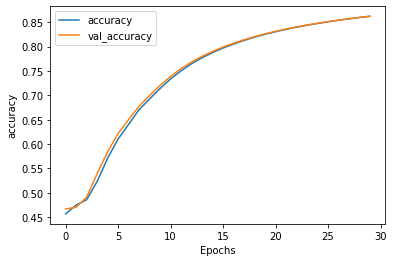

In [ ]:
# 성능 플롯팅
plot_graphs(history, 'accuracy')

In [ ]:
model.load_weight(DATA_OUT_PATH + model_name + '/weights.h5')

AttributeError: ignored